# **Using Machine Learning to Analyze and Predict Airbnb Prices - Tutorial**
## Spring 2024 Data Science Project
### Anna Dai, Kylie Gong, Mabel Hong

 ## Members Contribution Details

Contribution Checkpoints:

* A: Project idea - 5%
* B: Dataset Curation and Preprocessing - 10%
* C: Data Exploration and Summary Statistics - 10%
* D: ML Algorithm Design/Development - 25%
* E: ML Algorithm Training and Test Data Analysis - 20%
* F: Visualization, Result Analysis, Conclusion - 15%
* G: Final Tutorial Report Creation - 10%
* H: Additional (not listed above, if any) - 5%

Member 1: Anna Dai, Contribution: 100%

Member 2: Kylie Gong, Contribution: 100%

Member 3: Mabel Hong, Contribution: 100%

"We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial."

>Anna Dai     5/5/2024

>Kylie Gong   5/5/2024

>Mabel Hong   5/5/2024

I, Anna Dai, contributed to all parts. I helped brainstorm and select the idea for our project (A), and I helped with data preprocessing by identifying and explaining certain columns in our dataset to drop or keep and testing different ways to scale our data (B). For our ML model, I helped design specific questions for our model to answer, and I did lots of testing, adjusting parameters and running many different instances of our model on our dataset (C and D). I also helped with analysis of our results by exploring the variance and R2 value (E), and I continued to finetune the parameters of our model to decrease the variance and increase the R2. I also wrote parts of the analysis and conclusion section (F). I worked on adding all of this to our final tutorial (G) and additionally worked on commenting throughout the code (H)

I, Kylie Gong, contributed to all parts. For example, I helped design the steps for the exploratory analysis, including setting up the tests and the visualization of the results of our tests. This included graphs for the mean price per city and box plots for price. I also helped with deciding what features to drop and what features to keep for both the exploratory and primary analysis. I helped with the ML model by identifying and discussing with the group about the best model to use, and testing parameters and adding/removing features to increase the performance of our model. I created the decision tree graphs to visualize parts of the machine learning model. I also helped in writing the final tutorial, such as writing parts of the introduction, information about our primary analysis, and descriptions of our process.

I, Mabel Hong, contributed in all parts. For example, I worked on finalizing the question and explanation in the introduction section. I helped decide what columns to drop in the process of preparing our data for analysis. I helped perfect the graphs from our second checkpoint as well as adding new graphs for the final deliverable. I helped set up the Random Forest Regression in all steps, including training and fitting the model. I helped predict and graph the predictions against our actual dataset. In helping with the graph to visualize our models predictions, I helped the insights and conclusions from these discoveries of our dataset. Additionally, across the project I aided and found resources to add into our final deliverable to aid beginners in various topics and to allow a deeper dive into a topic.

## Introduction

Our topic is on the Airbnb prices across the US. We chose this topic because Airbnb is widely used as an alternative to hotels for travelers or locals for lodging. We are trying to analyze the average prices of Airbnbs between different cities and how prices may vary based on amenities, location, and property type.

The specific question we are trying to answer is: Given specific traits of an Airbnb, such as the city location, room type, and number of reviews, what will be the price per night?

Answering this question can help provide insights for travelers when seeking accommodations, such as finding price range for listings in a specific area and deciding specific features to look for in a listing to reach the ideal price range. By inputting specific features into our model and comparing predicted price per night, travelers can see how accommodations and characteristics of a listing affect price. This allows travelers to know what to look for in a listing to attain their ideal price range or to predict how much it will cost to stay in a listing based on their required accommodations.


**Required Tools:**

For this project, we are using python as the primary coding language and the following libraries:

* pandas
* matplotlib
* scipy
* seaborn
* sklearn
* numpy

To learn more about installing python and how each of these libraries work, the following resources may be useful:

* https://www.python.org/about/gettingstarted/
* https://pandas.pydata.org/docs/user_guide/index.html
* https://matplotlib.org/stable/users/index
* https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide
* https://seaborn.pydata.org/
* https://scikit-learn.org/stable/getting_started.html

## Data Curation

Our data came from the dataset “U.S. Airbnb Open Data” from www.kaggle.com/datasets/kritikseth/us-airbnb-open-data. This dataset consists of top Airbnb listings in the year 2020 from all over the US containing features including host id, hostname, listing id, listing name, latitude and longitude of listing, neighbourhood, price, room type, minimum number of nights, number of reviews, last review date, reviews per month, availability, host listings, and city.

Because we want our machine learning model to predict the price of stay per night given certain traits of the Airbnb stay, we decided to drop some columns that were not as relevant or helpful for our goal. The columns dropped include the name and ID of the Airbnb, the host name and ID, and date of the last review. Because we are only focused on the city as our main location factor, we also dropped the latitude, longitude, and neighborhood data.

Thus, the traits we kept were the price per night, the city location, the room type, the minimum nights allowed, the availability, the host listings count, the reviews per month, and the number of reviews.

Firstly, we imported all of the necessary libaries. We use libraries such as pandas to read and save our dataset as a dataframe, sklearn to set up, train, and test our machine learning model, numpy and scipy for math, and matplotlib to create graphs, diagarams, and charts for data visualization.

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib as mpl

from sklearn import tree

Next, we prepared the data for analysis. To further clean our data, we also dropped all duplicate rows and rows with N/A cells, as these are not helpful to our dataset. We only want to keep the unique rows of data, and we do not want rows that have missing information. Because our dataset is so large, dropping these rows is neglegible.

Because we want our machine learning model to predict the price of stay per night given certain traits of the Airbnb stay, we decided to drop some columns that were not as relevant or helpful for our goal. The columns dropped include the name and ID of the Airbnb, the host name and ID, and date of the last review. Because we are only focused on the city as our main location factor, we also dropped the latitude, longitude, and neighborhood data.

Thus, the traits we kept were the price per night, the city location, the room type, the minimum nights allowed, the availability, the host listings count, the reviews per month, and the number of reviews.

In [82]:
# Import the dataset, titled "AB US 2020"
df = pd.read_csv("AB_US_2020.csv", low_memory=False)
# Drop duplicate rows
df = df.drop_duplicates()
# Drop all rows that contain N/A cells
df = df.dropna(subset = ['price', 'city', 'room_type', 'minimum_nights', 'availability_365','calculated_host_listings_count', 'reviews_per_month', 'number_of_reviews'])
# Drop columns that we do not want to focus on
df = df.drop(['name','id', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'last_review'], axis=1)
df

,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,Private room,60,1,138,1.14,1,0,Asheville
1,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,Entire home/apt,75,30,89,0.81,2,298,Asheville
3,Entire home/apt,90,1,267,2.39,5,0,Asheville
4,Private room,125,30,58,0.52,1,0,Asheville
...,...,...,...,...,...,...,...,...
225936,Entire home/apt,144,1,1,1.00,1,328,Washington D.C.
225950,Entire home/apt,132,2,1,1.00,8,162,Washington D.C.
225955,Entire home/apt,112,2,1,1.00,8,171,Washington D.C.
225964,Entire home/apt,78,1,1,1.00,1,75,Washington D.C.


## Exploritory Data Analysis

We used scipy for statistical tests and matplotlib and seaborn to help visualize our analysis.

### Test 1: Test for mean Airbnb price (per night) in each city

Our first test was testing for the mean Airbnb price per night in each city. This is done by grouping the data from each city together and finding the mean for each city group. Matplotlib and seaborn were used to visualize this analysis.

city
Asheville            177.690170
Austin               240.623597
Boston               162.650182
Broward County       188.687575
Cambridge            166.099640
Chicago              145.279392
Clark County         191.750644
Columbus             342.703437
Denver               152.350251
Hawaii               234.549498
Jersey City          131.357070
Los Angeles          176.599557
Nashville            201.938508
New Orleans          167.474456
New York City        137.898557
Oakland              127.787193
Pacific Grove        258.013793
Portland             131.362368
Rhode Island         266.073600
Salem                157.888158
San Clara Country    138.271613
San Diego            298.694321
San Francisco        230.929969
San Mateo County     176.766680
Santa Cruz County    246.402227
Seattle              153.937577
Twin Cities MSA      208.189745
Washington D.C.      135.475658
Name: price, dtype: float64
The mean Airbnb price in the US is 184.52018847081632


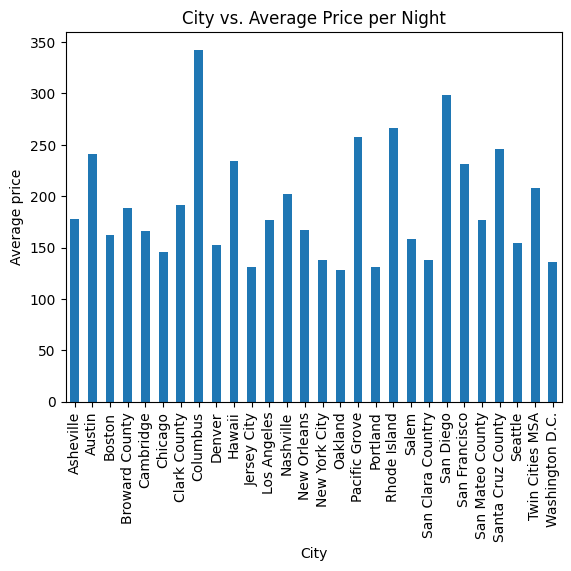

In [83]:
# Group dataset by city and find the mean for each city group
cityprice = df.groupby("city")["price"].mean()
print(cityprice)
# Plot the mean price for each city
ax = cityprice.plot(kind="bar", x = "city", y = "price average")
ax.set_title("City vs. Average Price per Night")
ax.set_xlabel("City")
ax.set_ylabel("Average price")
mean = df['price'].mean()
print(f'The mean Airbnb price in the US is {mean}')

Next, for more information, we plotted the mean Airbnb price per night in each ciy with confidence intervals.

<ipython-input-84-8d997821d28a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(df, y = "city", x = "price", palette = 'spring')


Text(0.5, 1.0, 'City and Price with Confidence Intervals')

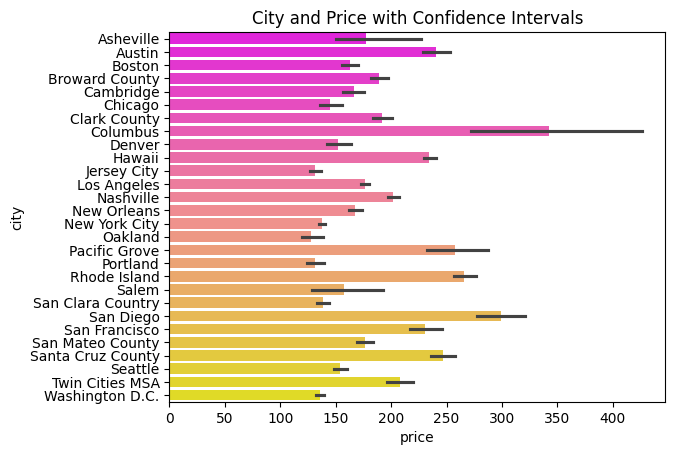

In [84]:
# Another plot of the mean city price, with confidence intervals
ax = sns.barplot(df, y = "city", x = "price", palette = 'spring')
ax.set_title("City and Price with Confidence Intervals")

In our first test, we found the means of the prices in each city. In 2020, the mean Airbnb price per night in each city is shown above. The overall mean Airbnb price per night in the US is $219.72. The Twin Cities had the highest mean price while Jersey City had the lowest mean price.

***Hypothesis Text Using ANOVA***

As a supporting test for the means of price per night in each city, we decided to do a hypothesis test using ANOVA. ANOVA is a test used to compare the means of different groups to determine if there is a relationship between an independent variable and a dependent variable (qualtrics). The ANOVA test is done by creating a table of the price for each city and using scipy to run the test.

Here we would like to offer a resource to beginners learning about the ANOVA test for the first time. This resource will aid beginners in establishing the foundation to understand our usage of ANOVA tests : https://www.qualtrics.com/experience-management/research/anova/.

To test if the location of the Airbnb has an affect on the average Airbnb price per night, we conducted a hypothesis test using the following hypotheses:

>$H_0$: The Airbnb's city location does not affect the price per night.

>$H_A$: The Airbnb's city location does affect the price per night.

Since we are comparing the mean price between multiple groups (the different cities), we proceed with an ANOVA test with $a=0.05$

In [85]:
# Obtain the counts in each category for the ANOVA test
table = pd.crosstab(df['price'], df['city']);
# Apply the crosstab to a Data Frame
table = pd.DataFrame(table);
# Perform the ANOVA test
F, p = scipy.stats.f_oneway(table['Asheville'], table['Austin'],table['Boston'],
                            table['Broward County'], table['Cambridge'],
                            table['Chicago'], table['Clark County'],
                            table['Columbus'], table['Denver'], table['Hawaii'],
                            table['Jersey City'], table['Los Angeles'],
                            table['Nashville'], table['New Orleans'],
                            table['New York City'], table['Oakland'],
                            table['Pacific Grove'], table['Portland'],
                            table['Rhode Island'], table['Salem'],
                            table['San Clara Country'], table['San Diego'],
                            table['San Francisco'], table['San Mateo County'],
                            table['Santa Cruz County'], table['Seattle'],
                            table['Twin Cities MSA'], table['Washington D.C.']);
p

0.0

We calculated a p-value of approximately 0*. Because our p-value is less than alpha, we reject the null hypothesis, and we conclude that the city where the Airbnb is located does have an affect on the Airbnb price per night.

To find out which of the different groups differ signficantly from each other, we will need to conduct post hoc tests between each of the different cities.

>*Note: The actual p-value is not 0, but because we are comparing so many different groups of data, we get a value so small that the `scipy.stats.f_oneway` function could only represent it as 0. In reality, the p-value is a positive number very close to 0.

### Test 2: Hypothesis Test using ANOVA

To test if the Airbnb room type has an affect on the average Airbnb price per night, we conducted a hypothesis test using the following hypotheses:

> $H_0$: The type of room does not affect the price per night.

> $H_A$: The type of room does affect the price per night.

Since we are comparing the mean price between multiple groups (the different room types), we proceed with an ANOVA test with $a = 0.05$

In [86]:
# Obtain the counts in each category for the ANOVA test
table = pd.crosstab(df['price'], df['room_type']);
# Apply the crosstab to a Data Frame
table = pd.DataFrame(table);
# Perform the ANOVA test
F, p = scipy.stats.f_oneway(table['Private room'], table['Entire home/apt'],table['Shared room'], table['Hotel room']);
p

2.1359157240353304e-51

We calculated a p-value of $4.13^{-53}$. Because our p-value is less than our alpha value, we reject the null hypothesis, and we conclude that the type of room does have an affect on the Airbnb price per night.

To find out which of the different groups differ signficantly from each other, we will need to conduct post hoc tests between each of the different room types.

Below is a visualization for the type of room vs. the average price per night of each room.

Text(0, 0.5, 'Average price')

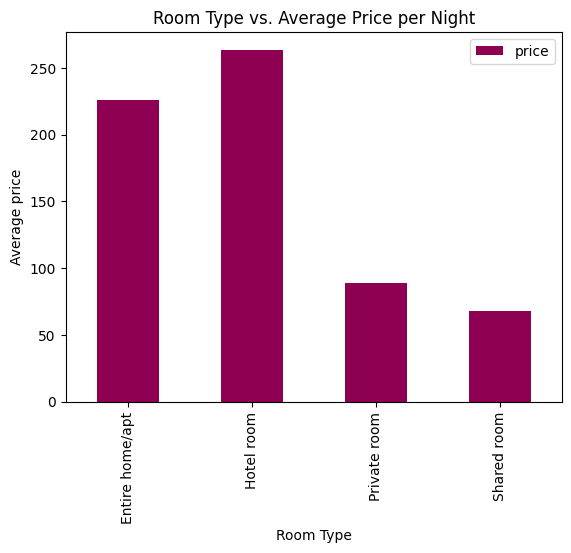

In [87]:
# Group the dataset according to the room type to calculate average price of each room type
roomprice = df.groupby('room_type')['price'].mean()
# Create bar graph of average price for each room type
ax = roomprice.plot(kind = "bar", legend = "true", colormap = "PiYG")
ax.set_title("Room Type vs. Average Price per Night")
ax.set_xlabel("Room Type")
ax.set_ylabel("Average price")

For more information, we created another bar graph of the same data, but with confidence intervals.

Text(0, 0.5, 'Average price')

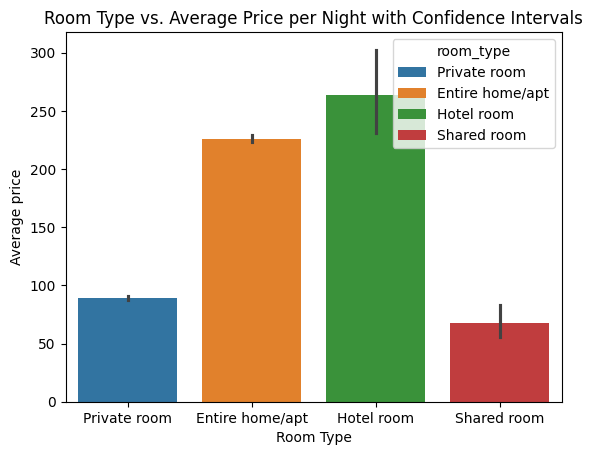

In [88]:
# Create bar graph of average price with confidence intervals
ax = sns.barplot(df, x = 'room_type', y = 'price', hue = 'room_type', legend = "brief")
ax.set_title("Room Type vs. Average Price per Night with Confidence Intervals")
ax.set_xlabel("Room Type")
ax.set_ylabel("Average price")

From our bar graph of the mean Airbnb price per night for each of the different room types, we can see that entire home/apt rooms and hotel rooms have a much higher mean price than private and shared rooms.

Both of these hypothesis tests tell us that the city location and the type of room do have an influence on the price per night of an Airbnb. This information is useful later on when we use these as traits for our machine learning model.

### Test 3: Test for Standard Deviation and Outliers

In our third test, we plotted a box and whisker plot of our dataframe to visualize standard deviation and outliers of our data set for the price column. A box plot is useful for visualizing the five-number summary, the minimum, first quartile, median, third quartile, and maximum, of a set of data and for visualizing the existence of any outliers (Khan Academy). These plots were created using pandas and Matplotlib.

> Here we want to offer a resource for beginners to better understand the box plots utilized in our Test 3. The resource that follows will assist in better understanding the foundations of box and whisker plots: https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review .

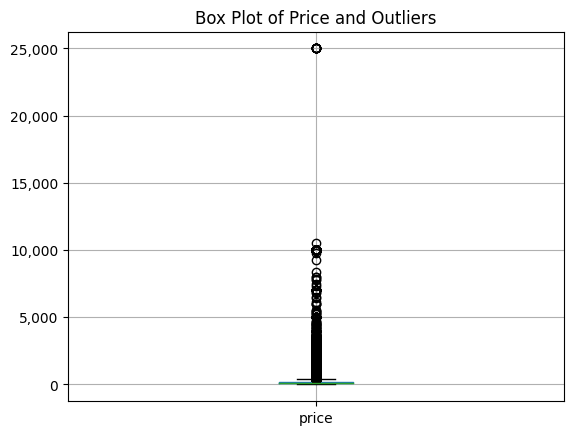

In [89]:
# Set up a data frame with the prices
price = pd.DataFrame(df['price'])
# Create boxplot of prices, with outliers.
ax = price.boxplot()
ax.set_title("Box Plot of Price and Outliers")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

Text(0.5, 1.0, 'Box Plot without Outliers')

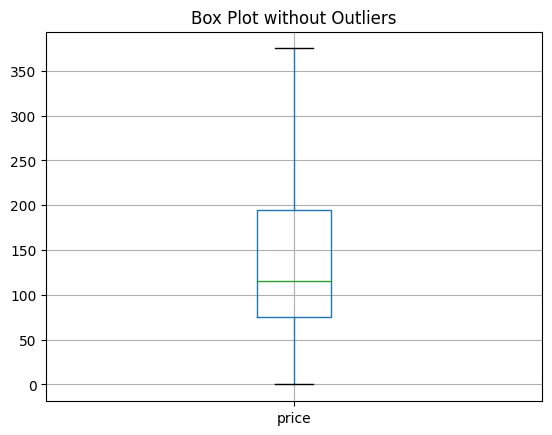

In [90]:
# Create boxplot of prices, without outliers.
ax = price.boxplot(showfliers=False)
ax.set_title("Box Plot without Outliers")

From this visualization, you can see that there exists a high volume of outliers, specifically in the price range of \$400-\$25,000. Additionally, we provided a box and whisker plot without outliers, showing that Q1 is approximately \$75 while Q3 is approximately \$200.

To support our findings and provide additional observations on outliers, we created a dataframe with the id and price of outliers which reside below the 1st percentile and above the 99th percentile of price across all AirBnB's. This showed that there exists 3,849 outliers defined below the 1st percentile and above the 99th percentile. Finally, we found and printed the standard deviation of price across our dataset and we found it to be approximately 570.35.

In [91]:
lower = df['price'].quantile(0.01)
upper = df['price'].quantile(0.99)
outliers = df[(df['price'] < lower) | (df['price'] > upper)]
print(outliers[['price']])
print(len(outliers[['price']]))

        price
48       1285
855      1250
894        19
916        19
941        20
...       ...
223576     24
223577     25
223578     25
225745     21
225779   2000

[3424 rows x 1 columns]
3424


In [92]:
price.std()

price    430.596928
dtype: float64

Because we visualized and identified 3,849 outliers, this observation supports our ANOVA test on our first hypothesis test comparing means of prices across cities, where we reject the null hypothesis and conclude that city does affect Airbnb price. Because we found so many outliers, this observation supports that there is a significant difference between the means of price across each city, since the data we are working with consists of different distributions for the different cities. It could be that most cities have much lower prices while other cities tend to have extremely high prices, and so when observing the boxplot of our entire dataset we see a large number of outliers that are greater than the maximum value in the box plot.

### Additional Supporting Graphs

<ipython-input-93-f544ecee34c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df['room_type'],order=df['room_type'].value_counts().index,palette='deep')


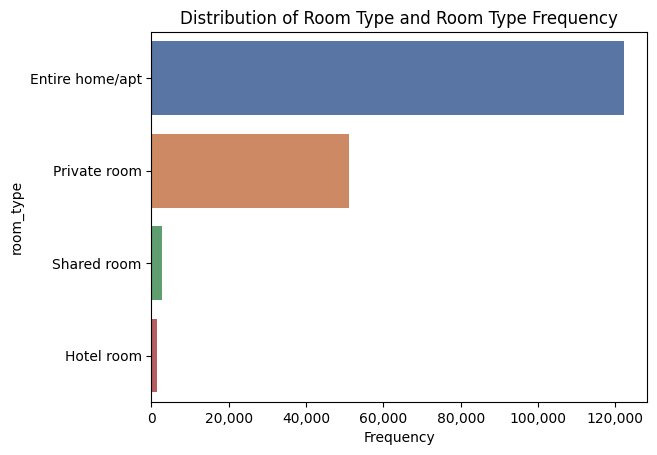

In [93]:
# Create plot for frequencys of room type
ax = sns.countplot(y=df['room_type'],order=df['room_type'].value_counts().index,palette='deep')
ax.set_yticks(ax.get_yticks())
ax.set_title('Distribution of Room Type and Room Type Frequency')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Frequency')
plt.show()

This graph helps us identify the frequency of various room_type categories, which are Entire home/apt and Private room.

Text(0.5, 1.0, 'Room Type Counts by City')

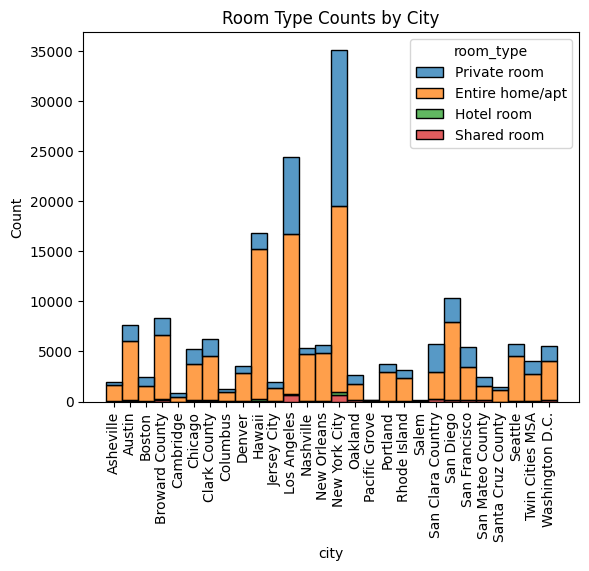

In [94]:
# Create histogram plot that is stacked to show room type distribution across cities
ax = sns.histplot(data=df, x="city", hue="room_type", multiple="stack")
plt.xticks(rotation=90);
ax.set_title("Room Type Counts by City")

This graph helps us identify the distribution of different room types in each city. We can see what cities have more "Private Room" room type listings than other cities, like New York City. We can also see that cities like Los Angeles and New York City have more "Shared room" room types. This graph supports our graph above and reinforces that the most popular room type is "Entire Room/Apt".

### Conclusion from exploritory analysis

From our three different statistical tests, we find that the Airbnb price per night can be affected by multiple factors, such as the city and the room type. Some cities, such as the Twin Cities and Columbus, have a much higher average price per night, while cities like Jersey City will have a much lower average price per night. Additionally, when looking at the different Airbnb room types, home/apt rooms and hotel rooms have a much higher mean price than private and shared rooms.

## Primary Analysis

###Choosing the Model

We have decided to use random forest regression to help us answer the questions of how prices may vary due to features such as room type, price, minimum nights, number of reviews, availability, city, number of host listings. We chose random forest because we are predicting an outcome based on many different traits of the AirBnb, and this model is suitable for this type of categorical data and numerical data after utilizing hot one encodings, which will be explained in the following paragraph. Additionally, because a random forests consists of a collection of several decision trees, it allows the machine learning model to prevent being overfit to the dataset in order to predict price compared to a singular decision tree.

> To learn more about Random Forest Regression, one can reference the following source: https://www.analytixlabs.co.in/blog/random-forest-regression/

> To learn more about Random Forest Regression for a viewer already well versed in the topic, one can refer to the following resourcehttps://journals.sagepub.com/doi/full/10.1177/1536867X20909688. This journal gives in depth information about the application and complexity of the regression model itself beyond just definition and classification.

###Preparing Dataset for Training

We used sklearn to conduct random forest regression analysis. Numpy and pandas were used to prepare our data for the machine learning model.

We removed the ID column as it is not a trait that determines price (each Airbnb has a unique ID, which would not be helpful for us to include in our training dataset). We also dropped all rows where the price, availability, or minimum nights was 0. This is because it would not make sense for price or minimum nights to be 0, so we treat it as a mistake and disclude it from our data, and any Airbnb where the availability is 0 is not useful for us.


In [95]:
# Drop rows where price, availability, or minimum nights is 0
df = df[df['price'] != 0]
df = df[df['availability_365'] != 0]
df = df[df['minimum_nights'] != 0]

We used logarithmic transformations to scale specific columns in our dataset and to mitigate the effects of outliers.

The values in the “number of reviews”, “availability”, and “minimum nights” columns had a wide range and were significantly larger than the other traits, so we scaled the data by applying np.log to these columns. To ensure that we do not encounter errors when applying the logarithmic function, we increased all values in the “number of reviews” column by 1 to account for the cells with 0.


In [96]:
# Use n.log on these traits to scale the data
df['number_of_reviews'] = np.log(df['number_of_reviews'] + 1)
df['availability_365'] = np.log(df['availability_365'])
df['minimum_nights'] = np.log(df['minimum_nights'])

In order to properly utilize the Random Forest Regression Model, we used one-hot encoding (pandas get_dummies() function) in order to convert the categorical date of room_type and city into binary vectors. As a result of using one-hot encoding, our categorical data columns are now binary columns and can be utilized to predict price.

> To learn more about one-hot encoding, which we used to convert categorical data to binary vectors/columns in order to utilize Random Forest Regression, one can reference the following source: https://deepai.org/machine-learning-glossary-and-terms/one-hot-encoding

In [97]:
# Create a copy of dataset
model_df = df.copy()
# Apply one-hot encoding to the Room Type trait
one_hot = pd.get_dummies(model_df['room_type'], dtype = "int")
model_df = model_df.drop('room_type',axis = 1)
# Add the one-hot encoded data back into the dataset
model_df = model_df.join(one_hot)

# Apply one-hot encoding to the city location trait
one_hot = pd.get_dummies(model_df['city'], dtype = "int")
model_df = model_df.drop('city',axis = 1)
# Add the one-hot encoded data back into the dataset
model_df = model_df.join(one_hot)

###Training and Testing Our Model

Finally, we split our dataset into our variables. Because we want to predict price, we set the price column as our target variable y and all other Airbnb traits as X.

To train and test our model, we split our dataset into the testing and training subsets and applied our Random Forest Regression model. We set the number of estimators to 200 and the maximum depth of the tree to 25. These values were determined through trial and error to minimize our mean squared error and R2 score values.

In [98]:
# Airbnb traits used to determine an output
X = model_df.drop(columns=['price'])
# Target variable, our desired output
y = np.log(model_df['price'])

# Split dataset into testing and training subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up Random Forest Regression model
reg = RandomForestRegressor(n_estimators=200, max_depth = 25)
# Fit our dataset to the model using our training dataset
reg.fit(X_train, y_train)

# Test our model by creating some predictions with the testing dataset
test_predictions = reg.predict(X_test)

# Analyze how well our model performed by using MSE and R2
print("Mean-Squared-Error:", mean_squared_error(y_test, test_predictions))
print("R2 Score:", r2_score(y_test, test_predictions))

# Reset and retrain the data for graphing purposes
X = df.drop(columns=['price'])
y = np.log(df['price'])

test_predictions = np.exp(test_predictions)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test = np.exp(y_test)

Mean-Squared-Error: 0.3155056663438868
R2 Score: 0.49174444547434615


Here, we display the mean squared error (MSE) and the R2 score. THe MSE measures the average squared difference between our predicted values from the model and the actual value from our dataset. The lower this value, the better our model is performing. The R2 score measures the goodness of fit of our model and ranges from 0 to 1 (but can be negative). We want this score to be as close to 1 as possible to ensure that our model is a good fit for our dataset and can make accurate predictions on new data.

> To learn more about MSE and R2 score for beginners, the following source can help aid in learning the foundations behind the definitions or MSE and R2 score: https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/

###Visualizations

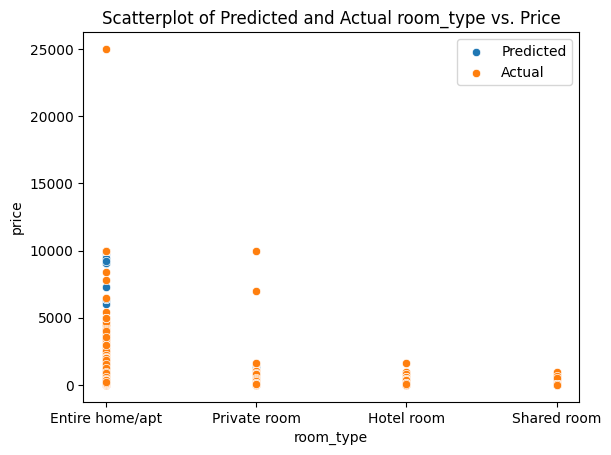

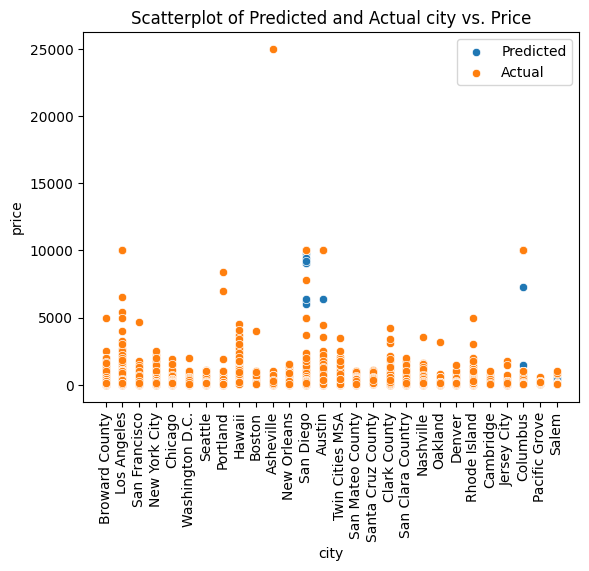

In [99]:
# Graph a scatter plot of the expected outputs and predicted outputs from our model
for feature in ['room_type', 'city']:
  sns.scatterplot(x = X_test[feature], y = test_predictions, label = 'Predicted')
  sns.scatterplot(x = X_test[feature], y = y_test, label = 'Actual')
  plt.title("Scatterplot of Predicted and Actual " + feature + " vs. Price")
  if(feature == 'city'):
    plt.xticks(rotation=90);
  plt.show()

Below is a visualization of our decision tree from the model showing only the root node.

[Text(0.5, 0.75, 'calculated_host_listings_count <= 0.5\nsquared_error = 0.619\nsamples = 67729\nvalue = 4.855'),
 Text(0.25, 0.25, '\n  (...)  \n'),
 Text(0.75, 0.25, '\n  (...)  \n')]

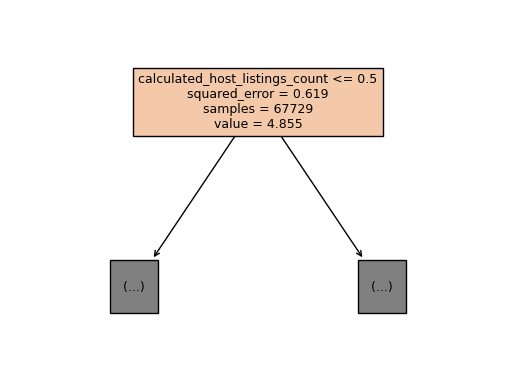

In [100]:
tree.plot_tree(reg.estimators_[0], feature_names=df.columns, filled=True, max_depth=0)

Below is a visualization of our decision tree up to a depth of 5.

[Text(0.5, 0.9285714285714286, 'x[5] <= 0.5\nsquared_error = 0.619\nsamples = 67729\nvalue = 4.855'),
 Text(0.25, 0.7857142857142857, 'x[6] <= 0.5\nsquared_error = 0.409\nsamples = 19603\nvalue = 4.24'),
 Text(0.125, 0.6428571428571429, 'x[7] <= 0.5\nsquared_error = 0.377\nsamples = 18956\nvalue = 4.212'),
 Text(0.0625, 0.5, 'x[3] <= 2.5\nsquared_error = 0.446\nsamples = 1113\nvalue = 3.629'),
 Text(0.03125, 0.35714285714285715, 'x[2] <= 0.125\nsquared_error = 0.762\nsamples = 240\nvalue = 4.253'),
 Text(0.015625, 0.21428571428571427, 'x[2] <= 0.035\nsquared_error = 0.819\nsamples = 75\nvalue = 4.684'),
 Text(0.0078125, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0234375, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.046875, 0.21428571428571427, 'x[0] <= 3.951\nsquared_error = 0.589\nsamples = 165\nvalue = 4.031'),
 Text(0.0390625, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0546875, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.09375, 0.35714285714285715, 'x[3] <= 50.5\nsquare

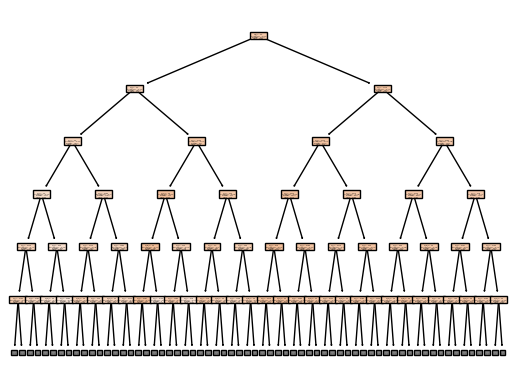

In [101]:
tree.plot_tree(reg.estimators_[0], filled=True, max_depth=5)

## Insights and Conclusions

Our model's mean squared error of and R2 score are printed out in the section "Training and Testing Our Model" above. Despite our various efforts in scaling our data in different ways (including applying logarithmic functions and normalizing parts of the data set) and testing different numbers for the estimators and maximum tree depth, this was our highest R2 score and we were unable to improve it any more. This could be due to the fact that there are many other key traits of an Airbnb that have a significant impact on the price per night that are not included in the dataset we used. For example, an Airbnb with more rooms and bathrooms will also tend to have a higher price than an Airbnb for one person. While this is partially accounted for in the “room type” trait in the dataset, the category “entire home/apt” has a wide range of possibilities that influence the price.

After reading through this project, an uninformed reader would have seen all of the steps in setting up a machine learning model for a specific dataset and why we made the choices we made at every step. In our introduction, we show some of the questions that a specific dataset can help answer. In our data curation and exploratory analysis section, we show how to set up and clean up our data to gain some information about our dataset in preparation for later analysis. In our primary analysis section, we choose the Random Forest Regression model and demonstrated how to further prepare our data by scaling the values and using one-hot encoding to transform categorical traits into quantitative, and we show the steps involved with training our data, including splitting our dataset into the testing and training subsets, fitting our data to the model, and then performing the actual training and testing. Finally, through our visualization section, we demonstrate how to visually display the results of our model. We can see how the predictions fared against the actual values, and we also see what one of the decision trees in our random forest model looks like. This Airbnb example demonstrates some of the common steps involved in the entire data science pipeline. Additionally, throughout the entire tutorial, we include various links to additional resources on the topcis covered.

Similarly, a reader who is already knowledgeable on the topic would also benefit from this project, as we show not just the general steps involved in the entire data science pipeline, but we also explain some of the specific decisions we made in the process. We expanded on the purpose of one-hot encoding and careful decisions in dropping certain parts of our dataset and scaling certain values. We also create detailed and descriptive visualization of our data, and throught the tutorial, we include various links to additional resources that contain more complex and detailed information, which is specifically catered to informed readers.